In [45]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/sms.tsv"
df = pd.read_csv(url, sep='\t', header=None, names=['label', 'message'])

print(f"Dataset shape: {df.shape}")

df["label"] = df["label"].map({"ham": 0, "spam": 1})
df["message_length"] = df["message"].apply(len)
print(df.head())

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df["message"])
y = df["label"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64
   label                                            message  message_length
0      0  Go until jurong point, crazy.. Available only ...             111
1      0                      Ok lar... Joking wif u oni...              29
2      1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3      0  U dun say so early hor... U c already then say...              49
4      0  Nah I don't think he goes to usf, he lives aro...              61


In [47]:
model = make_pipeline(NuSVC(nu=0.1, kernel='rbf', gamma='scale'))

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro", zero_division=0)
recall = recall_score(y_test, y_pred, average="macro", zero_division=0)
f1 = f1_score(y_test, y_pred, average="macro", zero_division=0)

print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1: {f1:.3f}\n")
print(classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.979
Precision: 0.988
Recall: 0.923
F1: 0.952

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.85      0.92       149

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



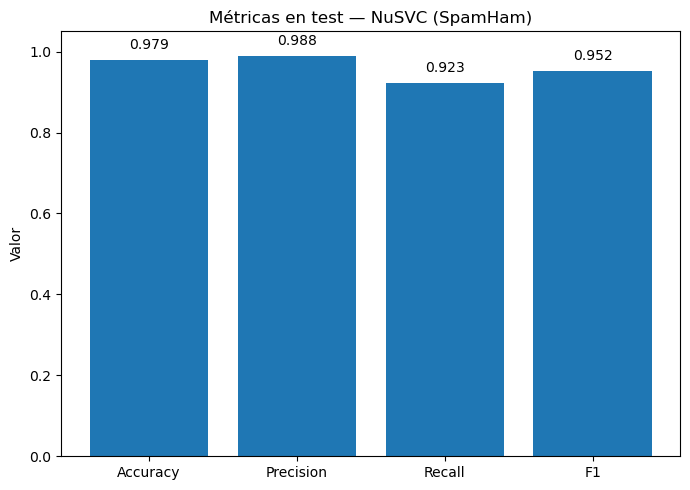

In [48]:
metric_names = ["Accuracy", "Precision", "Recall", "F1"]
metric_vals  = [accuracy, precision, recall, f1]

plt.figure(figsize=(7,5))
bars = plt.bar(metric_names, metric_vals)
plt.ylim(0, 1.05)
plt.title("Métricas en test — NuSVC (SpamHam)")
plt.ylabel("Valor")
for rect, val in zip(bars, metric_vals):
    h = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, h + 0.02, f"{val:.3f}",
             ha='center', va='bottom')
plt.tight_layout()
plt.show()

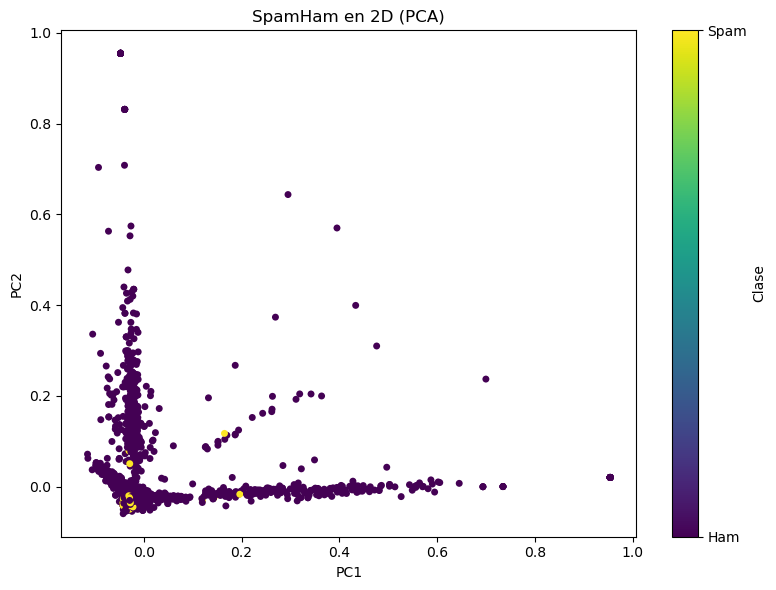

In [49]:

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", s=25, edgecolor="none")
plt.title("SpamHam en 2D (PCA)")
plt.xlabel("PC1"); plt.ylabel("PC2")
cbar = plt.colorbar(scatter, ticks=[0,1])
cbar.set_label("Clase")
cbar.set_ticks([0,1])
cbar.set_ticklabels(["Ham","Spam"])
plt.tight_layout()
plt.show()

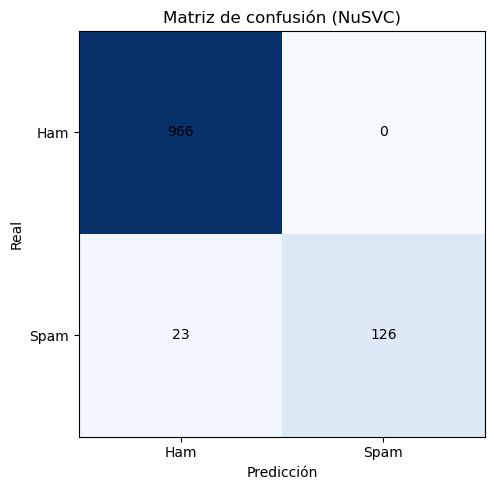

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Matriz de confusión (NuSVC)")
plt.xticks(ticks=[0,1], labels=["Ham","Spam"])
plt.yticks(ticks=[0,1], labels=["Ham","Spam"])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

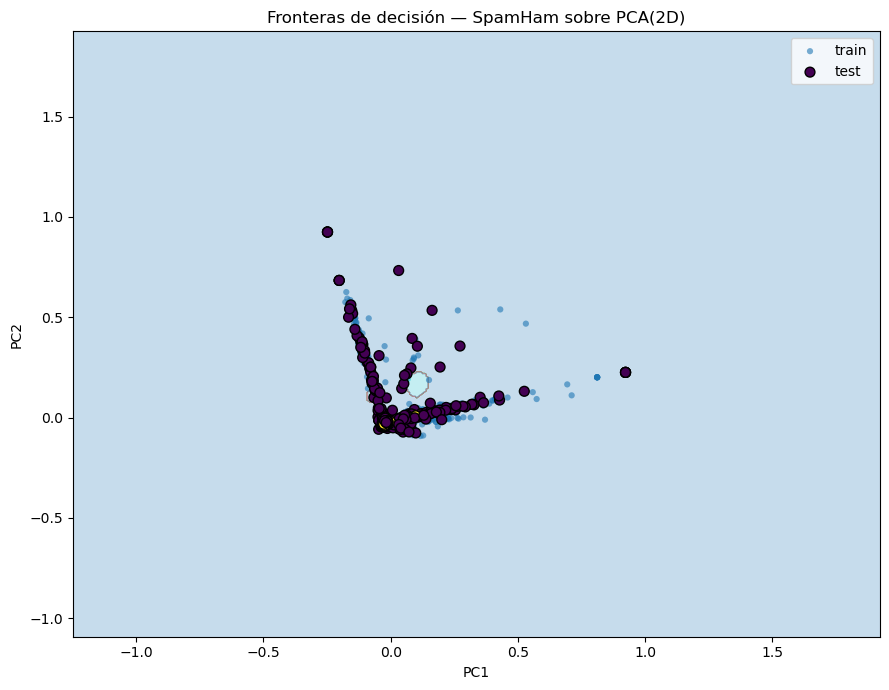

In [53]:
pca2 = PCA(n_components=2, random_state=42)
X_train_pca = pca2.fit_transform(X_train)
X_test_pca  = pca2.transform(X_test)


modelo2 = make_pipeline(NuSVC(nu=0.2, kernel='rbf', gamma='scale'))

modelo2.fit(X_train_pca, y_train)

x_min, x_max = X_train_pca[:,0].min()-1, X_train_pca[:,0].max()+1
y_min, y_max = X_train_pca[:,1].min()-1, X_train_pca[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400),
                     np.linspace(y_min, y_max, 400))
Z = modelo2.fit(X_train_pca, y_train).predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(9,7))
plt.contourf(xx, yy, Z, alpha=0.25, cmap="tab10")
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_train, cmap="tab10",
            s=20, edgecolor="none", alpha=0.6, label="train")
plt.scatter(X_test_pca[:,0],  X_test_pca[:,1],  c=y_test,  cmap="viridis",
            s=50, edgecolor="k",   label="test")
plt.title("Fronteras de decisión — SpamHam sobre PCA(2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend()
plt.tight_layout()
plt.show()